<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n20.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.415506,69.257649,32.079753,-0.000771,180.752137,180.752649,-0.000511
1,0.0,1.0,56.884536,81.569524,84.880765,-0.000399,233.334427,233.335030,-0.000603
2,0.0,2.0,69.746661,46.342689,38.376762,0.001359,164.467470,164.465916,0.001554
3,0.0,3.0,21.572254,56.261720,57.424182,-0.001686,145.256470,145.257379,-0.000909
4,0.0,4.0,27.503466,76.085091,40.070345,-0.001200,153.657702,153.658027,-0.000325
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.337831,42.017322,49.448833,-0.003013,145.800974,145.803494,-0.002520
119996,999.0,116.0,97.878632,43.331375,23.624147,0.000309,174.834463,174.834696,-0.000233
119997,999.0,117.0,47.957029,26.283680,56.055807,-0.001552,140.294964,140.295639,-0.000675
119998,999.0,118.0,71.655191,75.128027,75.754944,-0.000032,232.538129,232.538462,-0.000333


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.415506,69.257649,32.079753,-0.000771,180.752137,180.752649,-0.000511
1,0.0,1.0,56.884536,81.569524,84.880765,-0.000399,233.334427,233.335030,-0.000603
2,0.0,2.0,69.746661,46.342689,38.376762,0.001359,164.467470,164.465916,0.001554
3,0.0,3.0,21.572254,56.261720,57.424182,-0.001686,145.256470,145.257379,-0.000909
4,0.0,4.0,27.503466,76.085091,40.070345,-0.001200,153.657702,153.658027,-0.000325
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.337831,42.017322,49.448833,-0.003013,145.800974,145.803494,-0.002520
119996,999.0,116.0,97.878632,43.331375,23.624147,0.000309,174.834463,174.834696,-0.000233
119997,999.0,117.0,47.957029,26.283680,56.055807,-0.001552,140.294964,140.295639,-0.000675
119998,999.0,118.0,71.655191,75.128027,75.754944,-0.000032,232.538129,232.538462,-0.000333


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.415506  69.257649  32.079753  ...  180.752137  180.752649 -0.000511
      1.0    56.884536  81.569524  84.880765  ...  233.334427  233.335030 -0.000603
      2.0    69.746661  46.342689  38.376762  ...  164.467470  164.465916  0.001554
      3.0    21.572254  56.261720  57.424182  ...  145.256470  145.257379 -0.000909
      4.0    27.503466  76.085091  40.070345  ...  153.657702  153.658027 -0.000325
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.337831  42.017322  49.448833  ...  145.800974  145.803494 -0.002520
      116.0  97.878632  43.331375  23.624147  ...  174.834463  174.834696 -0.000233
      117.0  47.957029  26.283680  56.055807  ...  140.294964  140.295639 -0.000675
      118.0  71.655191  75.128027  75.754944  ...  232.538129  232.538462 -0.000333
      119.0  23.409765  81.541294  40.880330  ...  155.831190  155.831613 -0.000423

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.415506  69.257649  32.079753  ...  180.752137  180.752649 -0.000511
      1.0    56.884536  81.569524  84.880765  ...  233.334427  233.335030 -0.000603
      2.0    69.746661  46.342689  38.376762  ...  164.467470  164.465916  0.001554
      3.0    21.572254  56.261720  57.424182  ...  145.256470  145.257379 -0.000909
      4.0    27.503466  76.085091  40.070345  ...  153.657702  153.658027 -0.000325
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.337831  42.017322  49.448833  ...  145.800974  145.803494 -0.002520
      116.0  97.878632  43.331375  23.624147  ...  174.834463  174.834696 -0.000233
      117.0  47.957029  26.283680  56.055807  ...  140.294964  140.295639 -0.000675
      118.0  71.655191  75.128027  75.754944  ...  232.538129  232.538462 -0.000333
      119.0  23.409765  81.541294  40.880330  ...  155.831190  155.831613 -0.000423

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.415506,69.257649,32.079753,-0.000771,180.752137,180.752649,-0.000511
1,0.0,1.0,56.884536,81.569524,84.880765,-0.000399,233.334427,233.335030,-0.000603
2,0.0,2.0,69.746661,46.342689,38.376762,0.001359,164.467470,164.465916,0.001554
3,0.0,3.0,21.572254,56.261720,57.424182,-0.001686,145.256470,145.257379,-0.000909
4,0.0,4.0,27.503466,76.085091,40.070345,-0.001200,153.657702,153.658027,-0.000325
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.337831,42.017322,49.448833,-0.003013,145.800974,145.803494,-0.002520
119996,999.0,116.0,97.878632,43.331375,23.624147,0.000309,174.834463,174.834696,-0.000233
119997,999.0,117.0,47.957029,26.283680,56.055807,-0.001552,140.294964,140.295639,-0.000675
119998,999.0,118.0,71.655191,75.128027,75.754944,-0.000032,232.538129,232.538462,-0.000333


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.415506  69.257649  32.079753  ...  180.752137  180.752649 -0.000511
      1.0    56.884536  81.569524  84.880765  ...  233.334427  233.335030 -0.000603
      2.0    69.746661  46.342689  38.376762  ...  164.467470  164.465916  0.001554
      3.0    21.572254  56.261720  57.424182  ...  145.256470  145.257379 -0.000909
      4.0    27.503466  76.085091  40.070345  ...  153.657702  153.658027 -0.000325
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.337831  42.017322  49.448833  ...  145.800974  145.803494 -0.002520
      116.0  97.878632  43.331375  23.624147  ...  174.834463  174.834696 -0.000233
      117.0  47.957029  26.283680  56.055807  ...  140.294964  140.295639 -0.000675
      118.0  71.655191  75.128027  75.754944  ...  232.538129  232.538462 -0.000333
      119.0  23.409765  81.541294  40.880330  ...  155.831190  155.831613 -0.000423

[120000 rows x 7 columns]

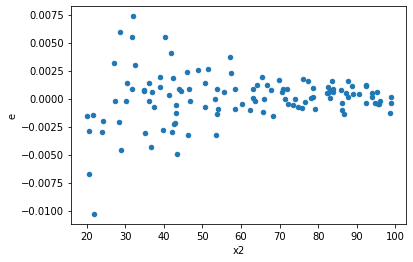

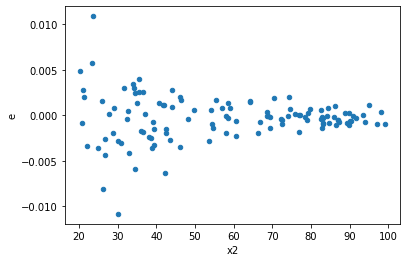

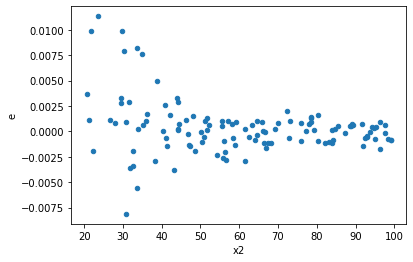

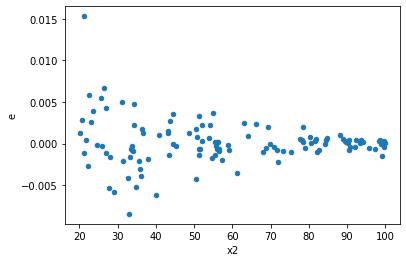

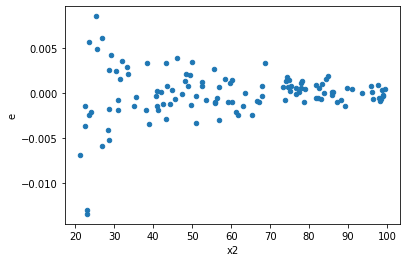

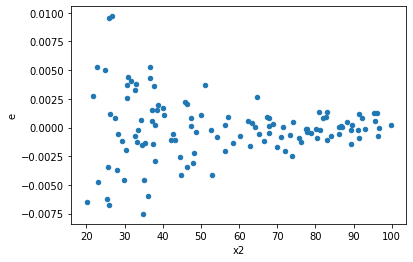

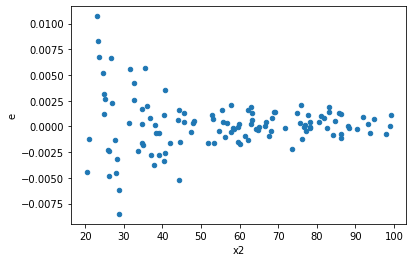

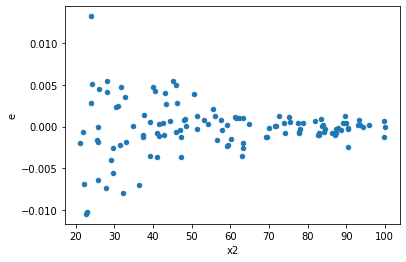

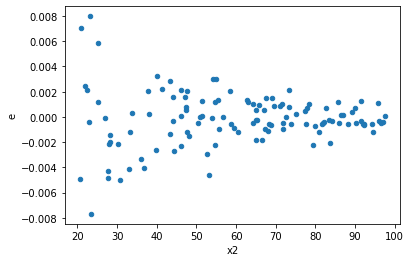

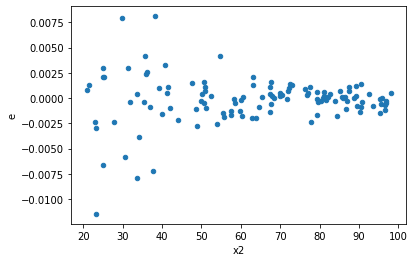

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,4.347153389189975e-05,0.0009587340154223686,9.879894066340853e-07,2.1789409441417468e-05,0.0453426426856759,3.644392100179963e-19,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3.2236126666689223e-05,0.0003279611072782477,7.326392424247551e-07,7.453661529051084e-06,0.09829252905692733,1.5847467471533682e-12,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,3.3489888187714495e-05,0.000266366440910256,7.611338224480567e-07,6.053782747960363e-06,0.12572863185493358,1.3993345763004571e-10,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,3.975642744379511e-05,0.0005560046487176769,9.035551691771616e-07,1.2636469289038111e-05,0.07150376806288587,3.5575677303527584e-15,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,2.5173376669755666e-05,0.0012905193129684074,5.721221970399015e-07,2.9329984385645622e-05,0.019506392827126892,6.12213895557967e-27,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,4.012829755068369e-05,0.0007259512560235987,9.120067625155384e-07,1.6498892182354515e-05,0.055276848435371014,2.093181854807476e-17,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2.000782104158208e-05,0.0005578128966334344,4.547232054905018e-07,1.2677565832578054e-05,0.03586833714733953,2.762624621347604e-21,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,1.5369364496075766e-05,0.0011399699822641509,3.493037385471765e-07,2.590840868782161e-05,0.013482253686671565,1.9426794636575757e-30,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2.5026915586110916e-05,0.0009850690727416058,5.687935360479753e-07,2.238793347140013e-05,0.02540625452432181,1.8247621519002625e-24,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64